# DBSCAN Algorithm 
Density-Based Spatial Clustering of Applications with Noise. <br><br>

In this notebook we're trying DBSCAN on MinMax Scaled data and on Standard Scaled data.<br>

## Steps: 
- Reading data
- Visiualizing data on different number of components
- Hyperparameter tuning
- Evaluation
- Choosing the best model.

## Methods:
- Dimensionality Reduction method: PCA. 
- Hyperparameters: Eps, MinPts. 
- Hyperparameters tuning method: combination of different values for eps and minPts determined using the K-distance graph. 
- Evaluation metric: Sillhouettee score.

In [1]:
# libraries
import pandas as pd

# dimensionality reduction 
from sklearn.decomposition import PCA

# visulaization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calling functions 
from src.utils import dbscan
from src.utils import EDA


## Reading MinMax Scaled Data

In [2]:
# Reading data 
data = pd.read_csv('../data/processed/data_scaled_minmax.csv')

In [4]:
# Remove other clustering labels 
minmax_data = data.drop(columns=["4-means label using PCA", "hierarchical_cluster"])

# Print the shape of data
minmax_data.shape

(3346, 231)

### Visiualizing the data 
To visiualiza data we have to perform dimensionality reduction, to determine the number of components we'll use this PCA Graph that plots number of components and varience. 
#### PCA Graph

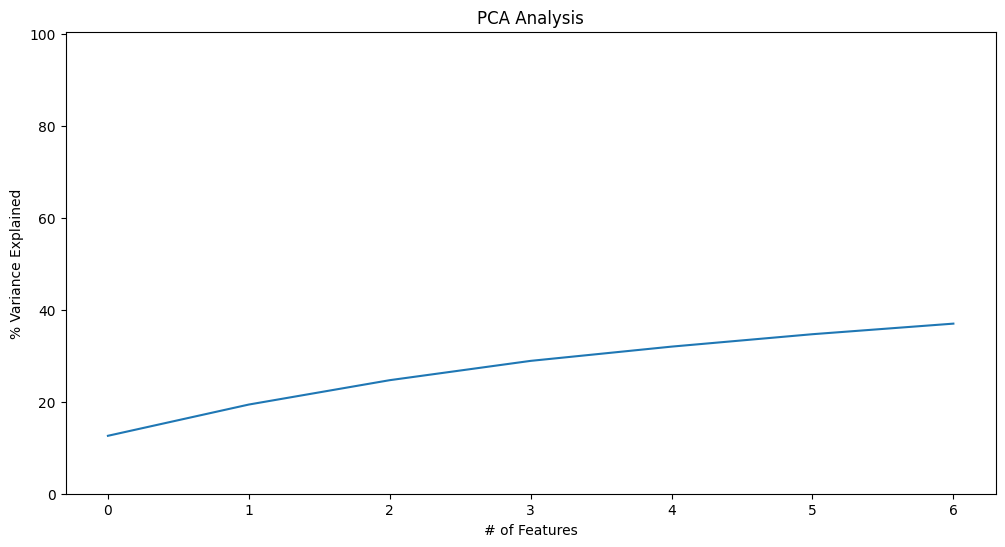

In [9]:
# PCA Graph 
EDA.create_PCA(minmax_data)

#### The data on 2 dimensions

Explained variance ratio for each component: [0.12570507 0.06839946]


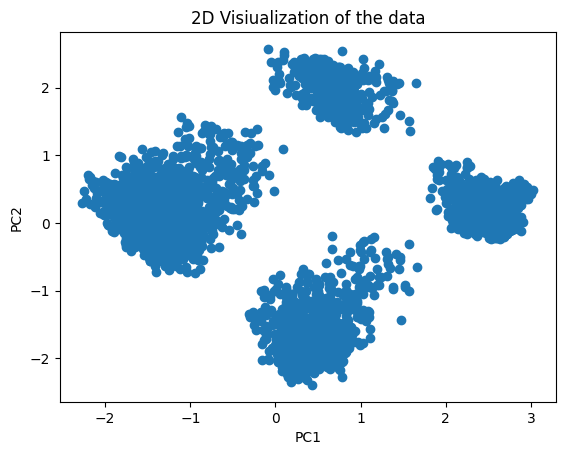

In [10]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(minmax_data, 2)

# The Data on 2D
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', title='2D Visiualization of the data')

#### The data on 3 dimensions

Explained variance ratio for each component: [0.12570507 0.06839946 0.0525458 ]


c:\users\dell\onedrive\سطح المكتب\github cluster repo\clustering-analysis\src\utils\EDA.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=cmap)


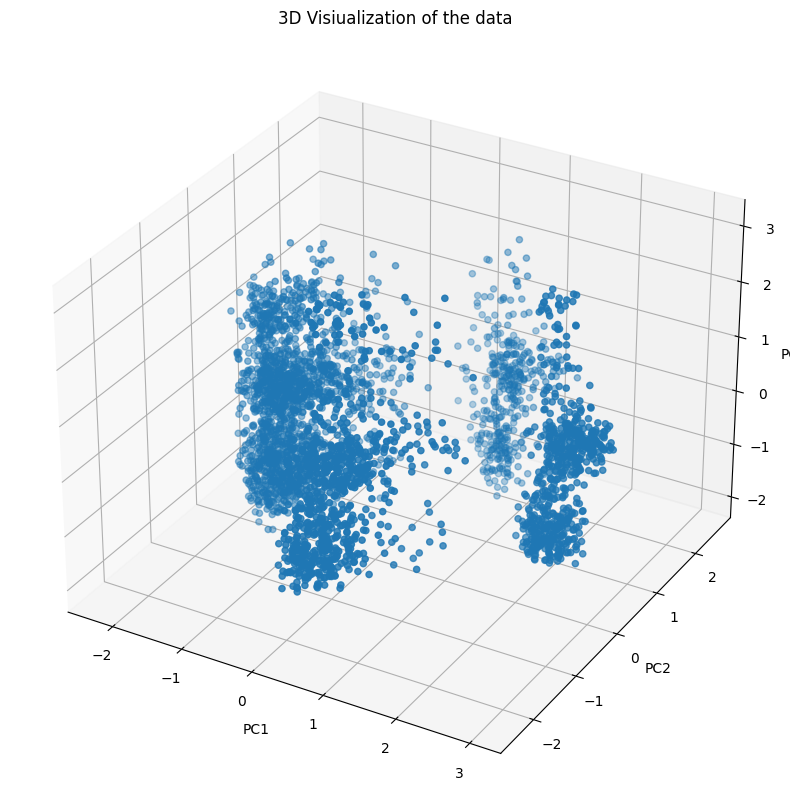

In [11]:
# Create a PCA On 3 components. 
X_3reduced = dbscan.create_pca(minmax_data, 3)

# Data on 3D
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="3D Visiualization of the data")

## DBSCAN With 231 Dimensions 
### Hyperparameters tuning

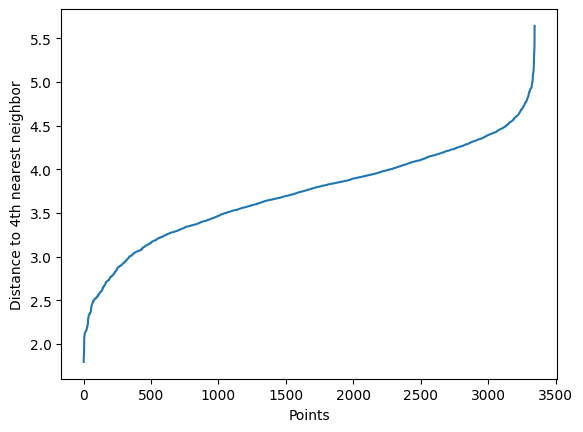

In [12]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(minmax_data, 4)

Based on the graph, I will choose eps = [3.5, 4, 4.5, 5]<br>
Based on our dimensions, I will choose minPts = [4, 6, 115, 231, 462] 

In [8]:
D231_results = dbscan.range_hyperparameters(minmax_data, [3.5, 4, 4.5, 5], [4, 6, 115, 231, 462])
D231_results 

eps minPts  silhouette_score n_clusters
0  3.5      4         -0.096150          7
1  3.5      6         -0.082772          4
2  4.0    115         -0.021915          3

It seems that dbscan did a bad job clustering with the 231 dimesnions, we've got negative silhouette scores <br>

Number of Clusters =  4


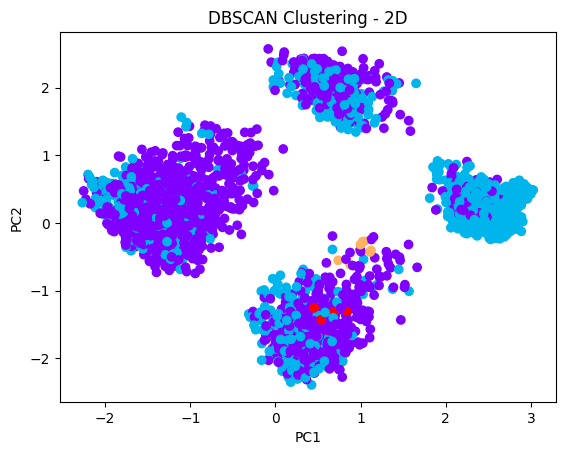

In [14]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  7


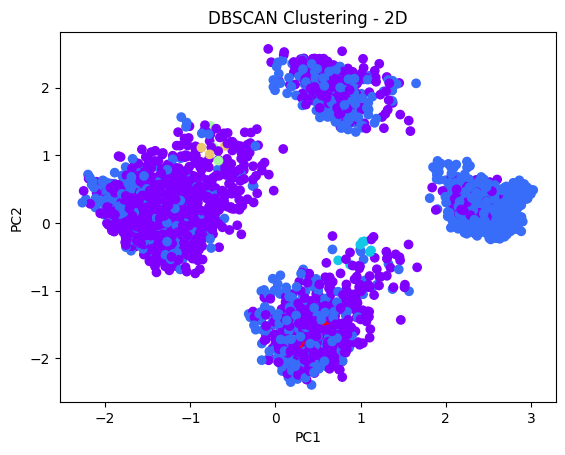

In [15]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 4)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  3


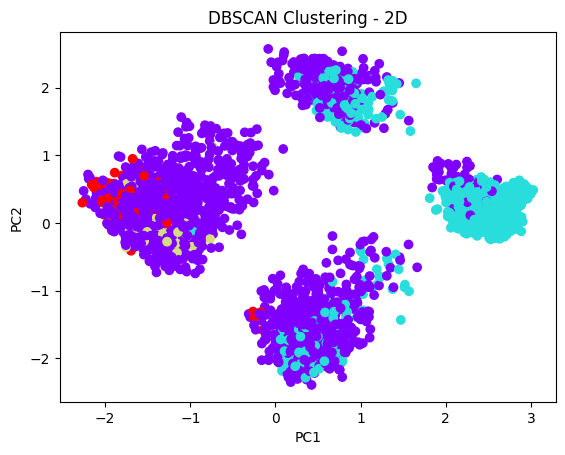

In [16]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(minmax_data, 4, 115)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')


Its obvious that dbscan didn't cluster the results very well because from the visiualization of the data it seems that we have 4 clusters, but there are more close clusters within the same one. <br> lets plot it on 3 dimensions

Number of Clusters =  4


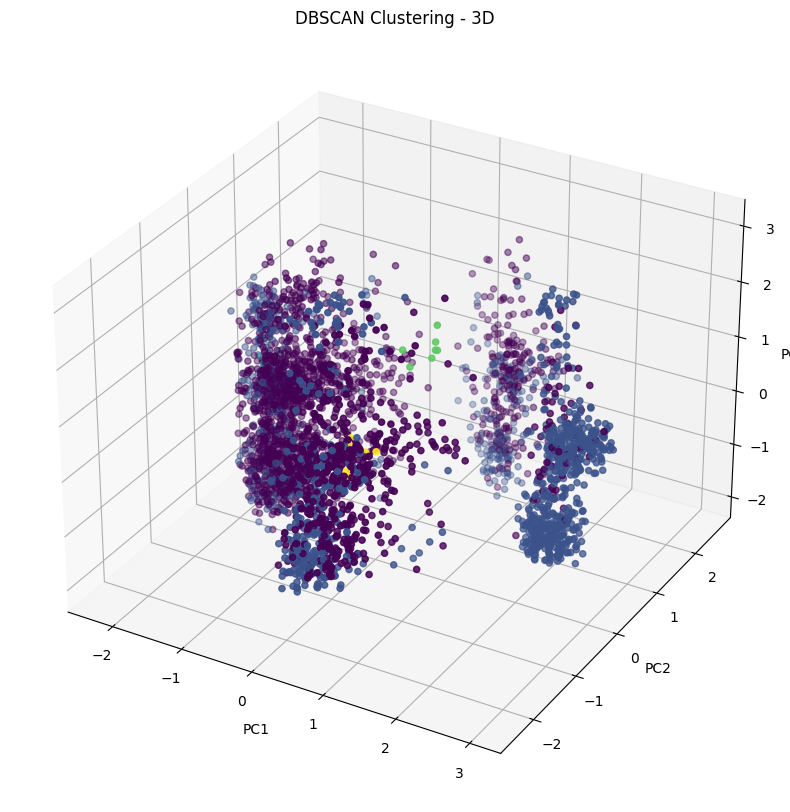

In [17]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  7


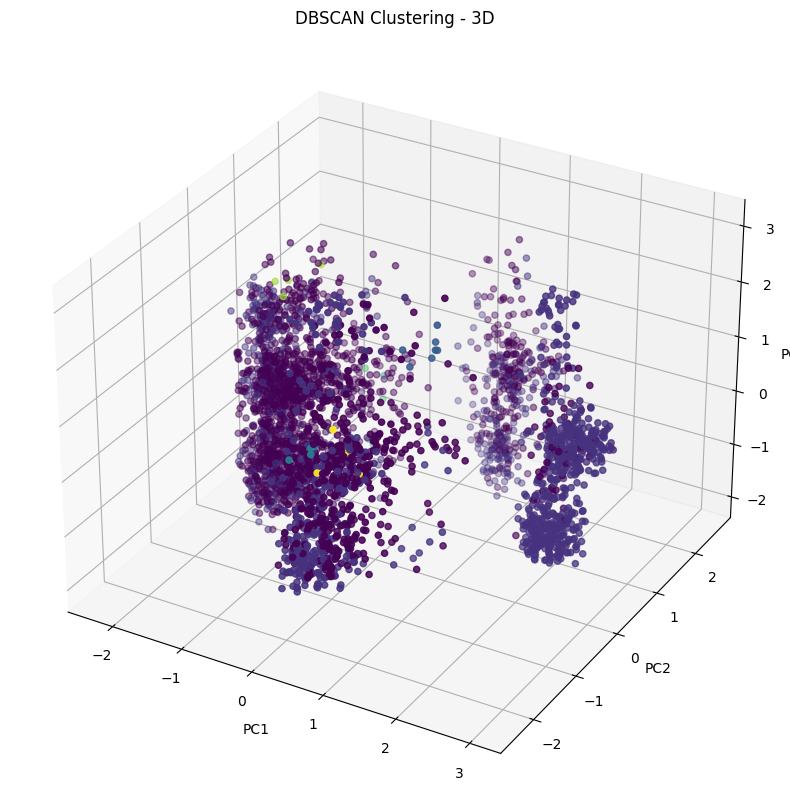

In [18]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 4)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  3


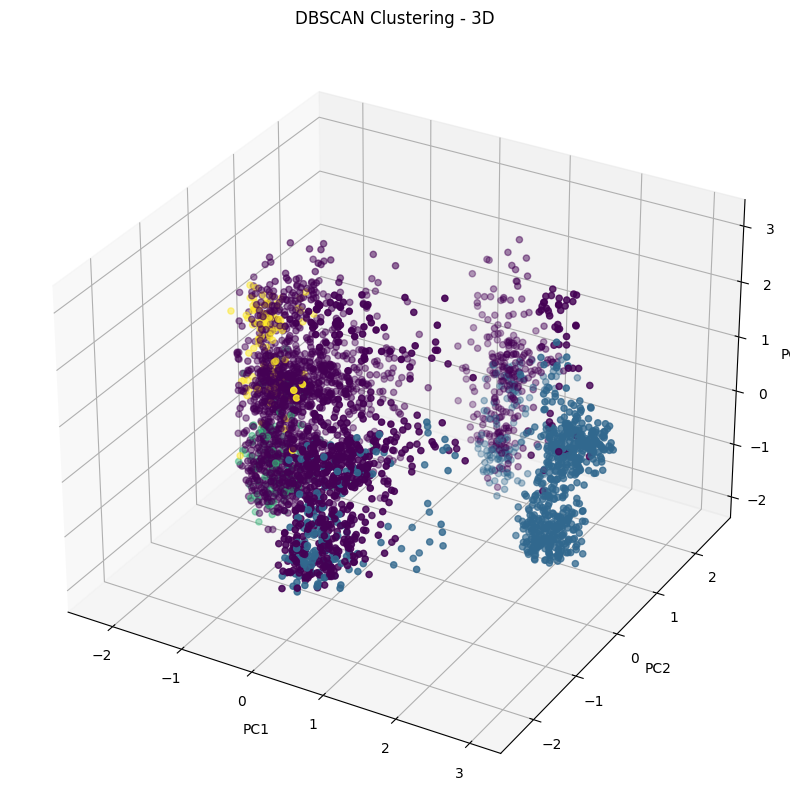

In [19]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 4, 115)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

DBSCAN didn't cluster the data well with 231 Dimesnions.

## DBSCAN With 2 Dimensions 

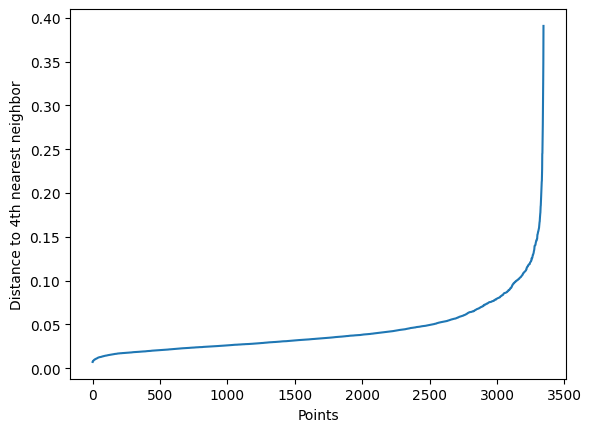

In [20]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_2reduced,4)

### Hyperparameters:
I will try these values for eps =  [0.05, 0.08, 0.1, 0.15], minPts = [2, 4, 6, 8, 10, 12]

In [21]:
D2_results = dbscan.range_hyperparameters(X_2reduced, [0.05, 0.08, 0.1, 0.15], [2, 4, 6, 8, 10, 12])
D2_results

eps minPts  silhouette_score n_clusters
0   0.05      2         -0.267954        166
1   0.05      4         -0.267529         55
2   0.05      6         -0.293337         38
3   0.05      8         -0.344708         38
4   0.05     10         -0.383835         29
5   0.05     12         -0.475766         24
6   0.08      2          0.000536         68
7   0.08      4          0.149188         28
8   0.08      6          0.209473         12
9   0.08      8          0.141636          9
10  0.08     10          0.179502          8
11  0.08     12          0.134928          8
12  0.10      2          0.032199         35
13  0.10      4          0.245916         16
14  0.10      6          0.314569         12
15  0.10      8          0.360959          8
16  0.10     10          0.541852          5
17  0.10     12          0.548311          5
18  0.15      2          0.525670          7
19  0.15      4          0.535883          6
20  0.15      6          0.645838          6
21  0.15      8          0.602598          6
22  0.15     10          0.569082          6
23  0.15     12          0.536197          6

note that eps = 0.15 generally produced the highest sillhouttee scores and most of them resulted in 6 clusters<br> Lets plot top scores on 2d and 3d. 

Number of Clusters =  6


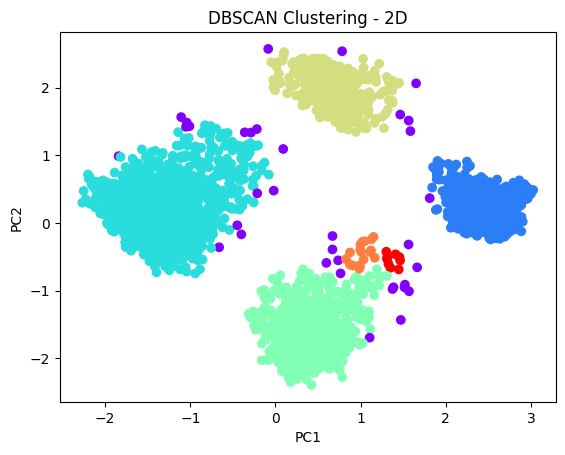

In [22]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  6


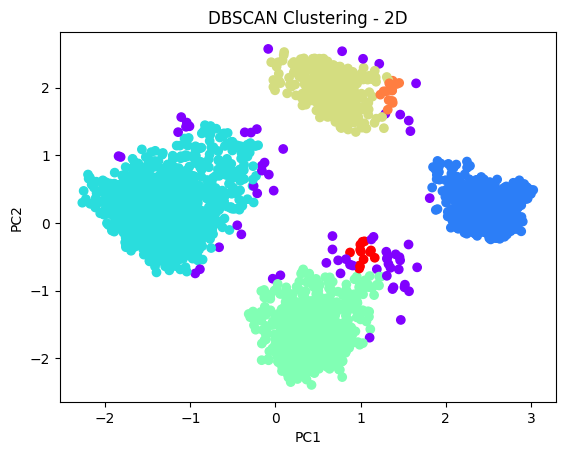

In [23]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  6


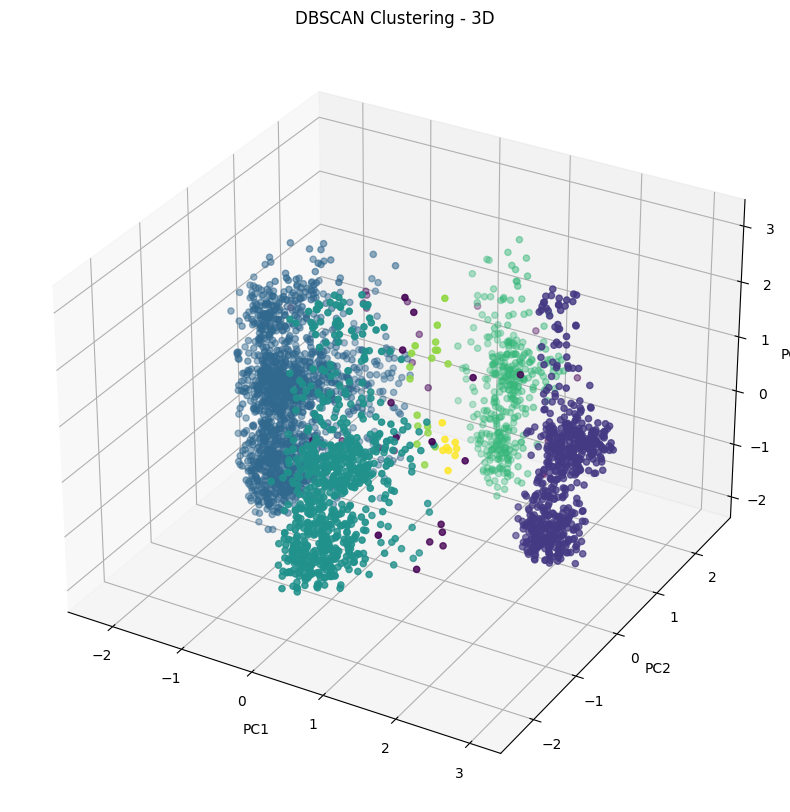

In [24]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  6


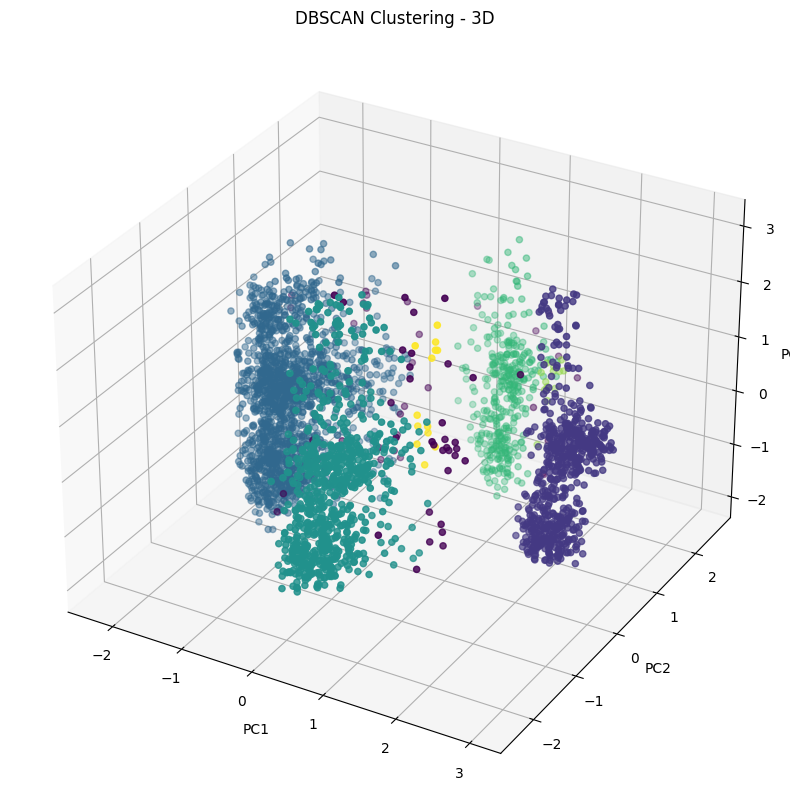

In [25]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

DBSCAN on 2D did a very good job clustering the data. <br>
scores are close to 1 

## DBSCAN With 3 Dimensions 

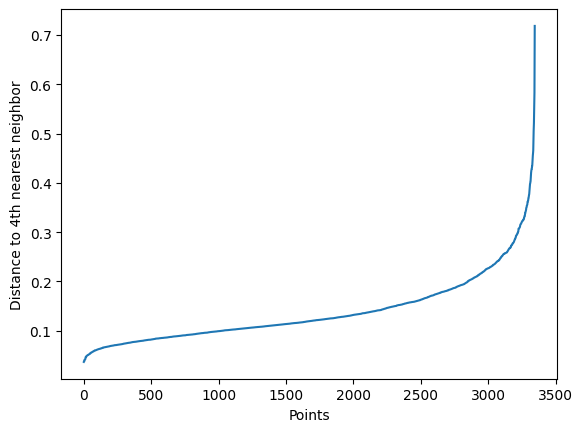

In [26]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_3reduced, 4)

### Hyperparameters
eps =  [.15, .2, .25, .3, .35], minPts = [3, 6, 9, 12]

In [27]:
D3_results = dbscan.range_hyperparameters(X_3reduced, [.15, .2, .25, .3, .35], [3, 6, 9, 12])
D3_results

eps minPts  silhouette_score n_clusters
0   0.15      3         -0.377020         63
1   0.15      6          0.001347         15
2   0.15      9         -0.012363         14
3   0.15     12         -0.354951         18
4   0.20      3         -0.107274         38
5   0.20      6          0.086909         12
6   0.20      9          0.238221          9
7   0.20     12          0.344790          5
8   0.25      3          0.028090         21
9   0.25      6          0.373742          9
10  0.25      9          0.213014          9
11  0.25     12          0.452485          5
12  0.30      3          0.350857         11
13  0.30      6          0.290534          9
14  0.30      9          0.425153          7
15  0.30     12          0.443025          7
16  0.35      3          0.389115          6
17  0.35      6          0.347107          7
18  0.35      9          0.488786          6
19  0.35     12          0.428178          8

highest sillhouttee scores were from different eps values ranges from 0.25 to 0.35, they also resulted on clusters on range 5 to 7<br> Lets plot top scores on 2D and 3D.

Number of Clusters =  6


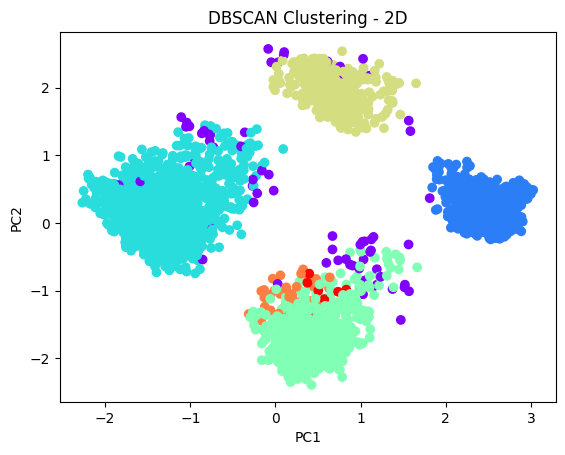

In [28]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, .35, 9)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  5


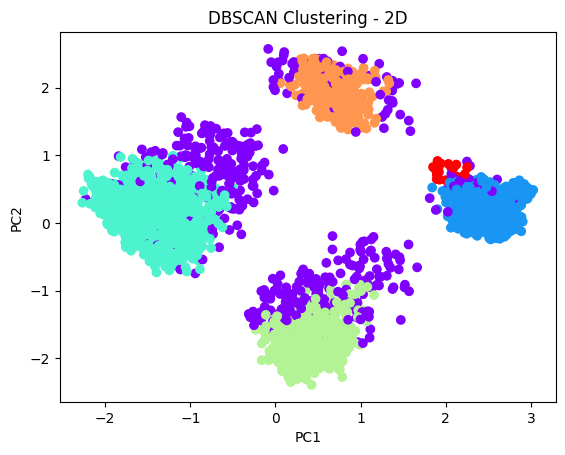

In [29]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, .25, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  7


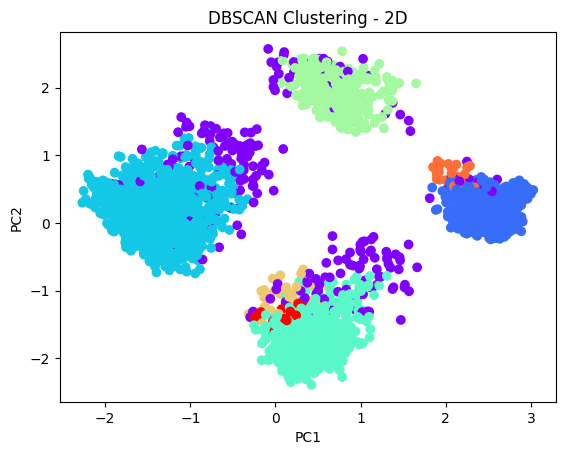

In [30]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, .3, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  6


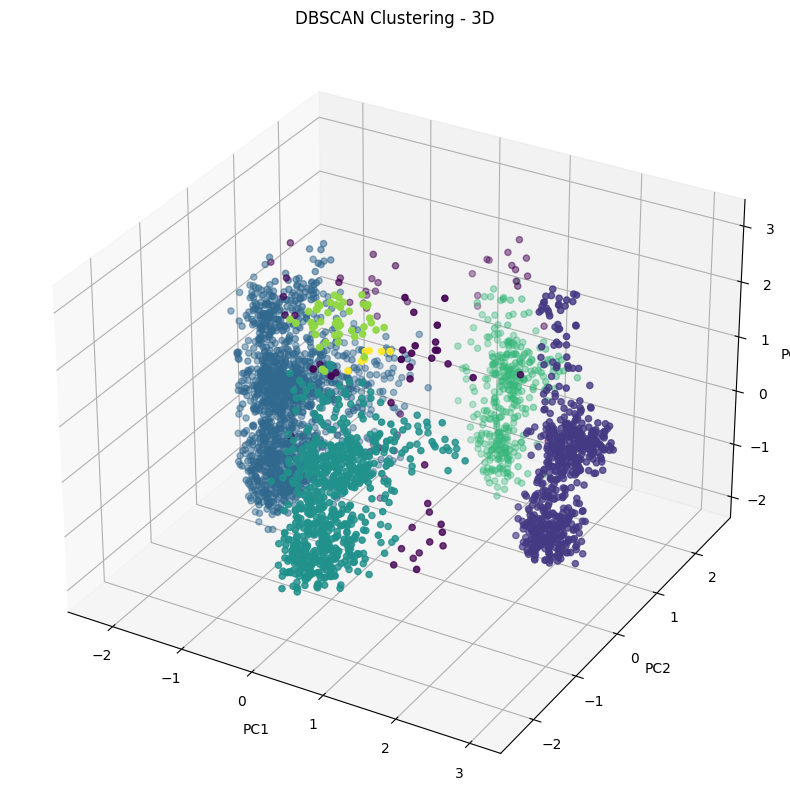

In [31]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .35, 9)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  5


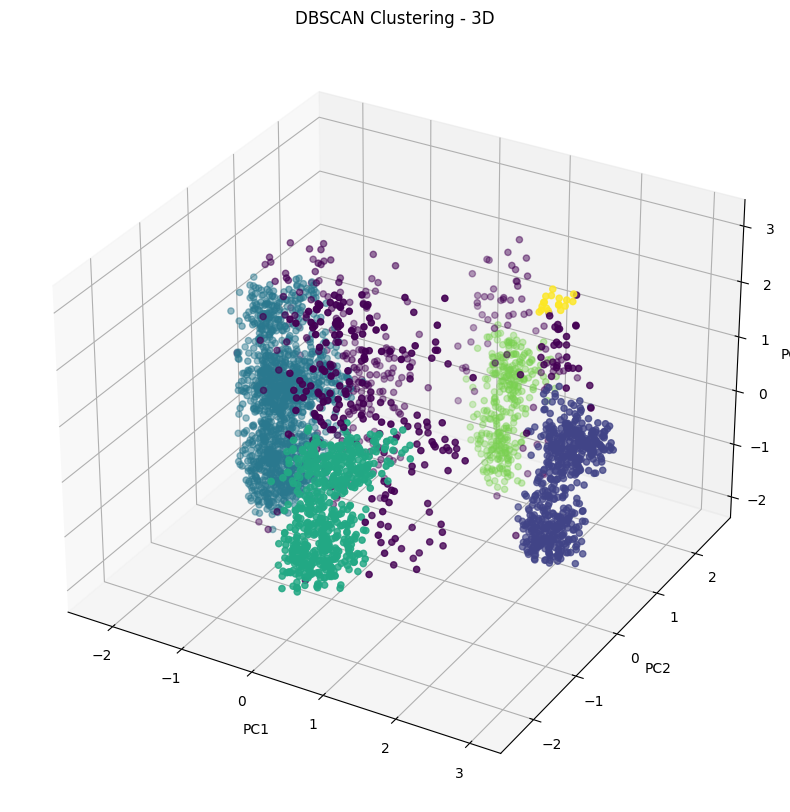

In [32]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .25, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  7


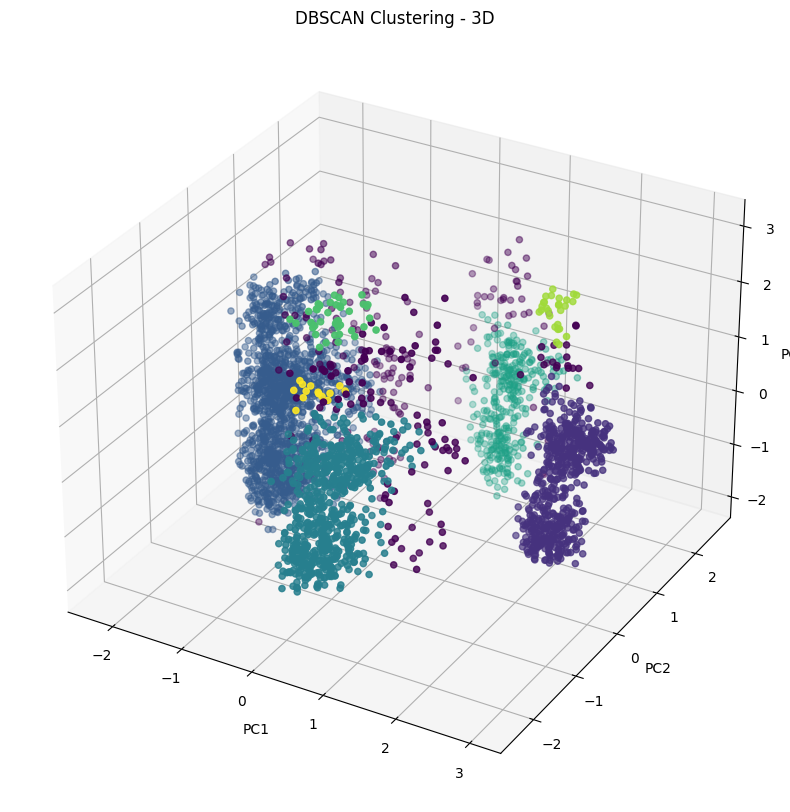

In [33]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .3, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

### Comparing the results from all models on Minmax data

In [34]:
minmax_results = pd.DataFrame()

minmax_results = pd.concat([D231_results, D2_results, D3_results],axis=0)
minmax_results

eps minPts  silhouette_score n_clusters
0   3.50      4         -0.096150          7
1   3.50      6         -0.082772          4
2   4.00    115         -0.021915          3
0   0.05      2         -0.267954        166
1   0.05      4         -0.267529         55
2   0.05      6         -0.293337         38
3   0.05      8         -0.344708         38
4   0.05     10         -0.383835         29
5   0.05     12         -0.475766         24
6   0.08      2          0.000536         68
7   0.08      4          0.149188         28
8   0.08      6          0.209473         12
9   0.08      8          0.141636          9
10  0.08     10          0.179502          8
11  0.08     12          0.134928          8
12  0.10      2          0.032199         35
13  0.10      4          0.245916         16
14  0.10      6          0.314569         12
15  0.10      8          0.360959          8
16  0.10     10          0.541852          5
17  0.10     12          0.548311          5
18  0.15      2          0.525670          7
19  0.15      4          0.535883          6
20  0.15      6          0.645838          6
21  0.15      8          0.602598          6
22  0.15     10          0.569082          6
23  0.15     12          0.536197          6
0   0.15      3         -0.377020         63
1   0.15      6          0.001347         15
2   0.15      9         -0.012363         14
3   0.15     12         -0.354951         18
4   0.20      3         -0.107274         38
5   0.20      6          0.086909         12
6   0.20      9          0.238221          9
7   0.20     12          0.344790          5
8   0.25      3          0.028090         21
9   0.25      6          0.373742          9
10  0.25      9          0.213014          9
11  0.25     12          0.452485          5
12  0.30      3          0.350857         11
13  0.30      6          0.290534          9
14  0.30      9          0.425153          7
15  0.30     12          0.443025          7
16  0.35      3          0.389115          6
17  0.35      6          0.347107          7
18  0.35      9          0.488786          6
19  0.35     12          0.428178          8

## Reading Standard Scaled Data

In [35]:
# Reading data 
standard_data = pd.read_csv('../data/processed/data_scaled_standard.csv')

# Print the shape of data
standard_data.shape

(3346, 231)

### Visiualizing the data 
To visiualiza data we have to perform dimensionality reduction, to determine the number of components we'll use this PCA Graph that plots number of components and varience. 
#### PCA Graph

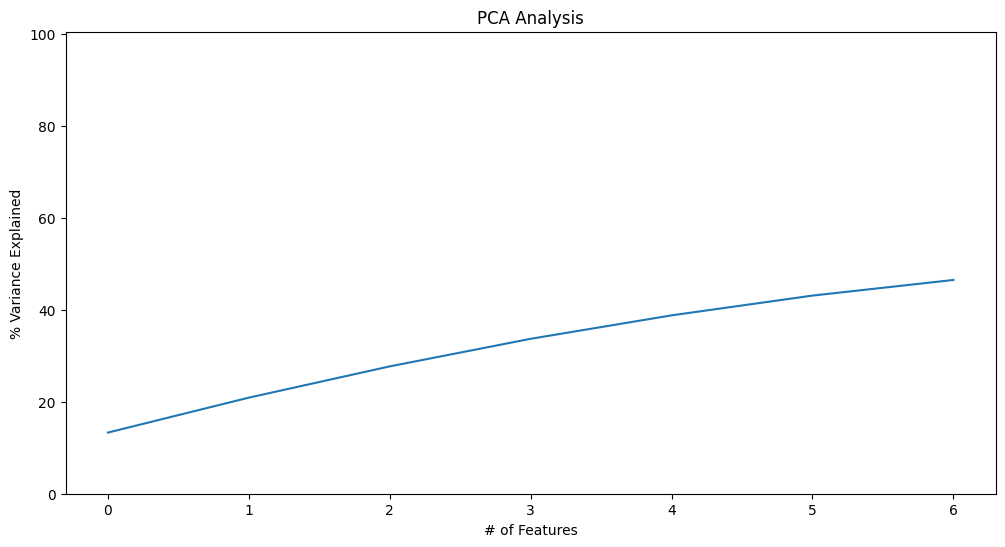

In [36]:
# PCA Graph 
EDA.create_PCA(standard_data)

#### The data on 2 dimensions

Explained variance ratio for each component: [0.13291958 0.07575221]


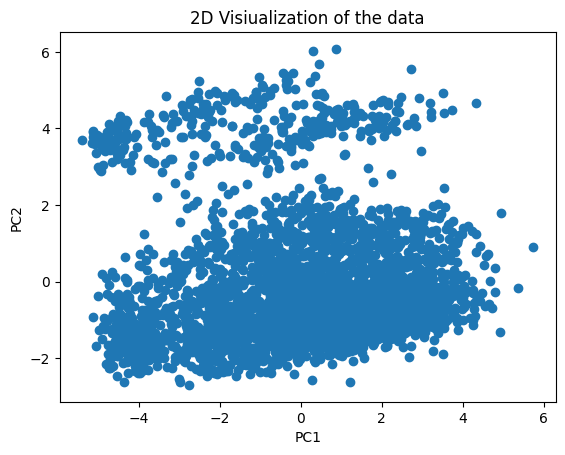

In [37]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(standard_data, 2)

# The Data on 2D
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', title='2D Visiualization of the data')

#### The data on 3 dimensions

Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


c:\users\dell\onedrive\سطح المكتب\github cluster repo\clustering-analysis\src\utils\EDA.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=cmap)


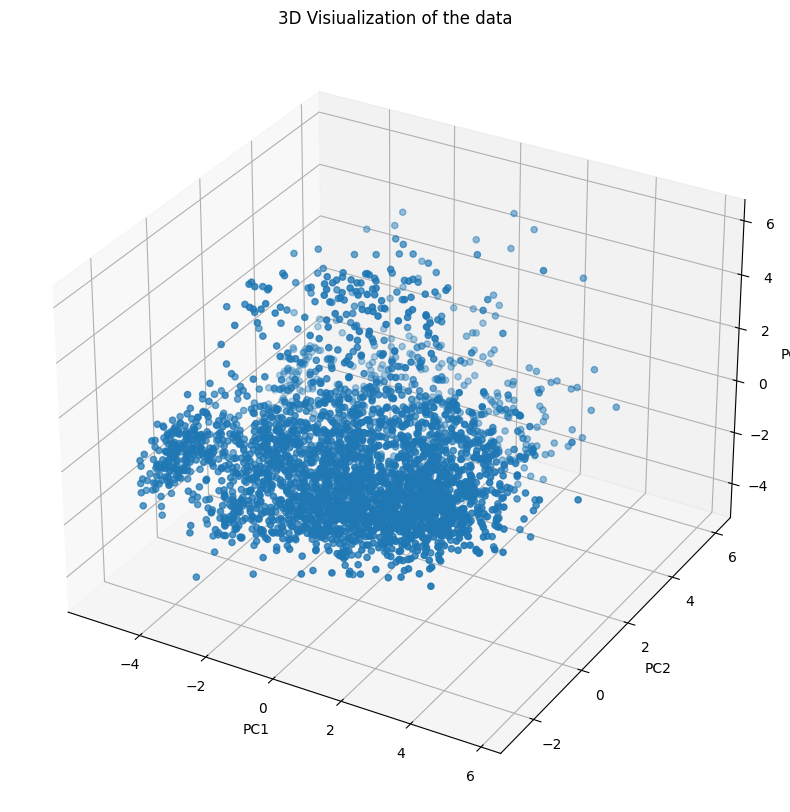

In [38]:
# Create a PCA On 3 components. 
X_3reduced = dbscan.create_pca(standard_data, 3)

# Data on 3D
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="3D Visiualization of the data")

## DBSCAN With 231 Dimensions 
### Hyperparameters tuning: 

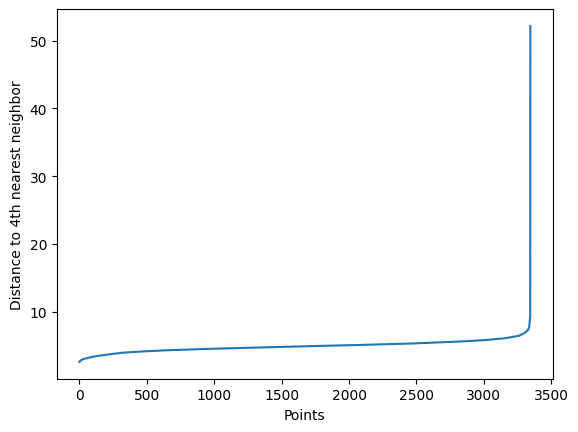

In [39]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(standard_data, 4)

Based on the graph, I will choose these values for eps = [6, 6.5, 7, 7.5, 8, 8.5] <br>
Based on our dimensions, I will choose minPts =  [2, 3, 4, 6, 115, 200, 231, 462]

In [40]:
D231_results = dbscan.range_hyperparameters(standard_data, [6, 6.5, 7, 7.5, 8, 8.5], [2, 3, 4, 6, 115, 200, 231, 462])
D231_results 

eps minPts  silhouette_score n_clusters
0    6      2          0.130167          4
1  6.5      2          0.210236          2
2  6.5      3          0.210236          2
3  7.5      2          0.534094          2

these few results produced generally good scores but relativly low number of clusters.<br> lets plot top scores on 2d and 3d

Number of Clusters =  2


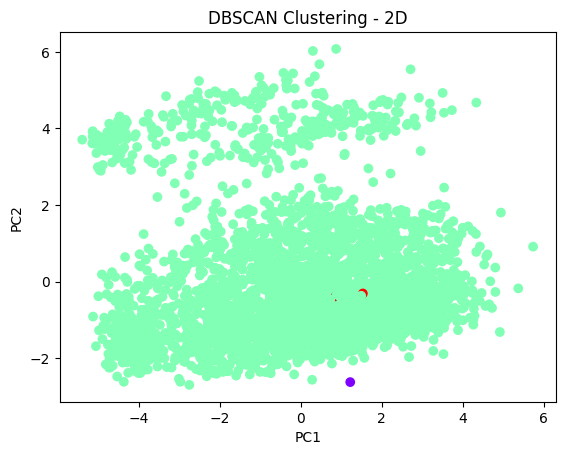

In [41]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(standard_data, 7.5, 2)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  2


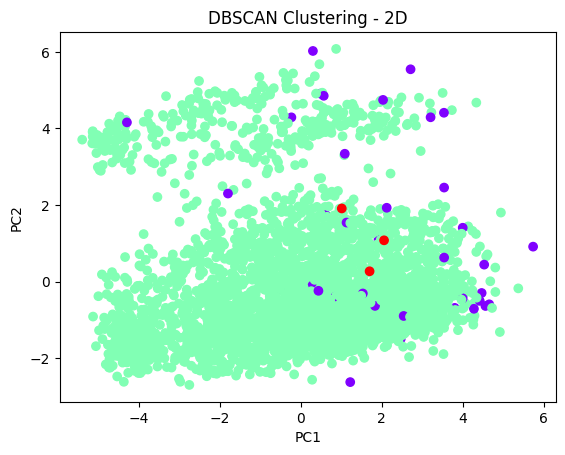

In [42]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(standard_data, 6.5, 3)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  2


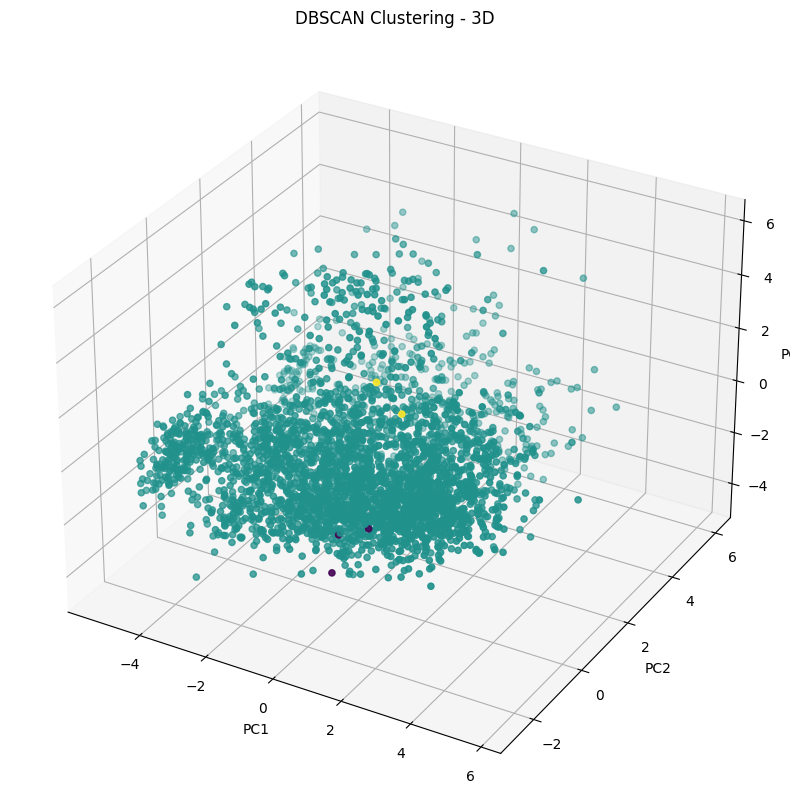

In [43]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(standard_data, 7.5, 2)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  1


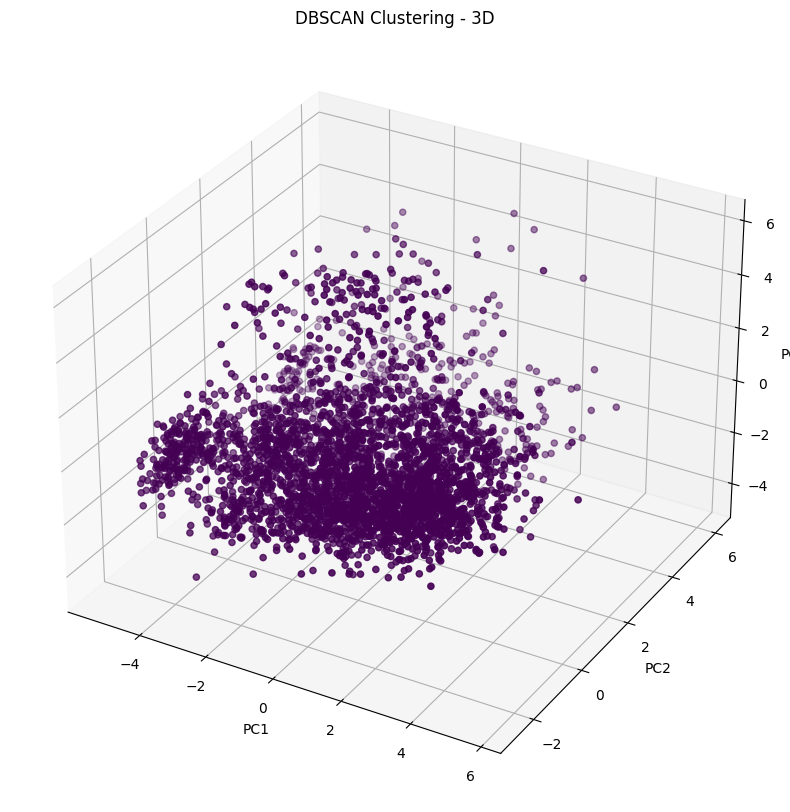

In [44]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 6.5, 3)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Even though the results produced very good scores, but it did a bad job clustering data. 

## DBSCAN With 2 Dimensions 

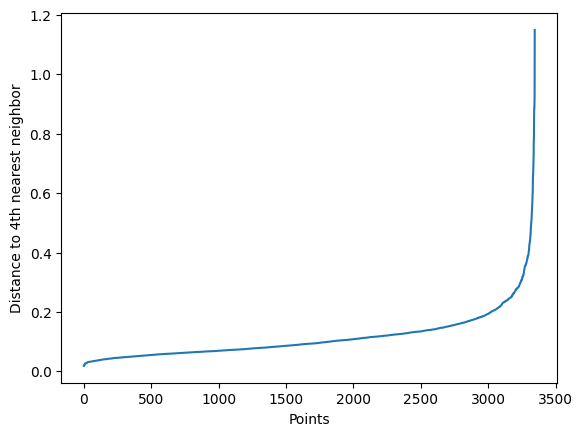

In [45]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_2reduced,4)

#### Hyperparameters
eps =  [0.2, 0.25, 0.3, 0.35, 0.4], minPts = [4, 6, 8, 10]

In [46]:
D2_results = dbscan.range_hyperparameters(X_2reduced, [0.2, 0.25, 0.3, 0.35, 0.4], [4, 6, 8, 10])
D2_results

eps minPts  silhouette_score n_clusters
0   0.20      4         -0.211422         25
1   0.20      6         -0.218220         21
2   0.20      8         -0.284764         18
3   0.20     10         -0.181140          8
4   0.25      4         -0.020874         15
5   0.25      6          0.023242         13
6   0.25      8         -0.162318         14
7   0.25     10          0.006408         11
8   0.30      4          0.129572          8
9   0.30      6          0.298244          8
10  0.30      8          0.288539          9
11  0.30     10          0.281530          8
12  0.35      4          0.304668          5
13  0.35      6          0.326006          4
14  0.35      8          0.349651          5
15  0.35     10          0.346236          5
16  0.40      4          0.186473          5
17  0.40      6          0.136205          4
18  0.40      8          0.365001          4
19  0.40     10          0.353060          5

note that highest scores comes from eps = 0.4 or 0.35 and most of them resulted in 6 clusters<br>  Lets plot top scores on 2d and 3d.

Number of Clusters =  4


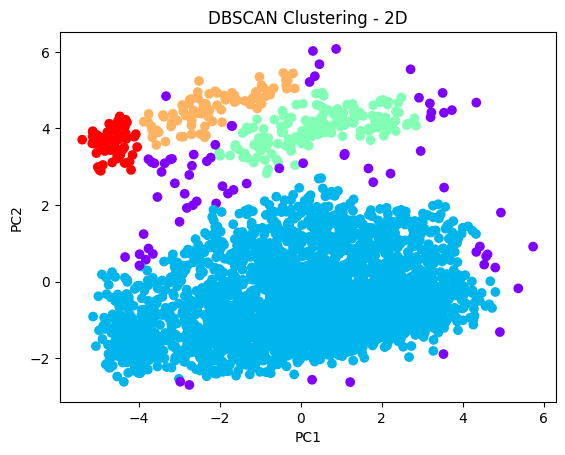

In [47]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.4, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  5


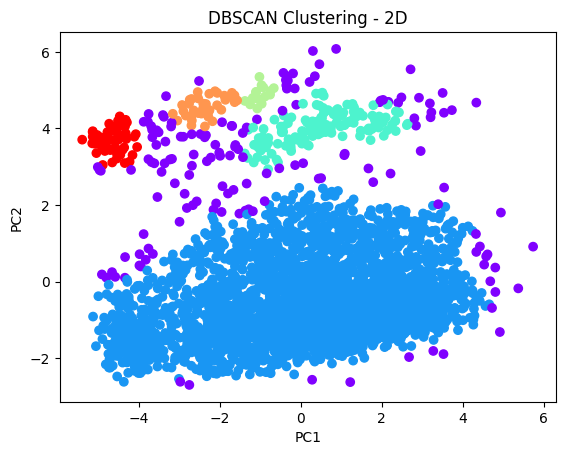

In [48]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.35, 10)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  4


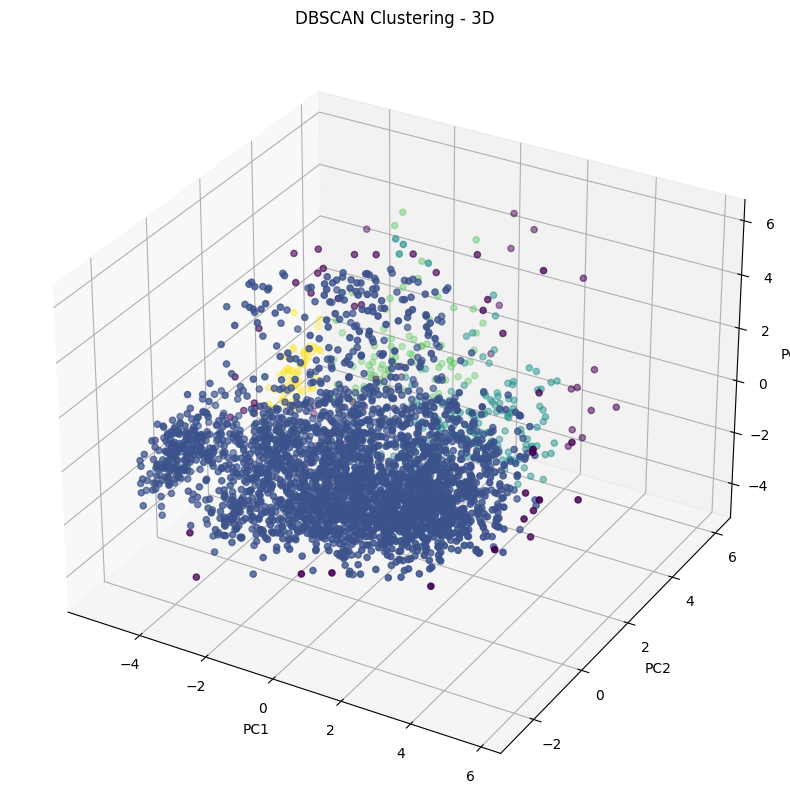

In [49]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.4, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  5


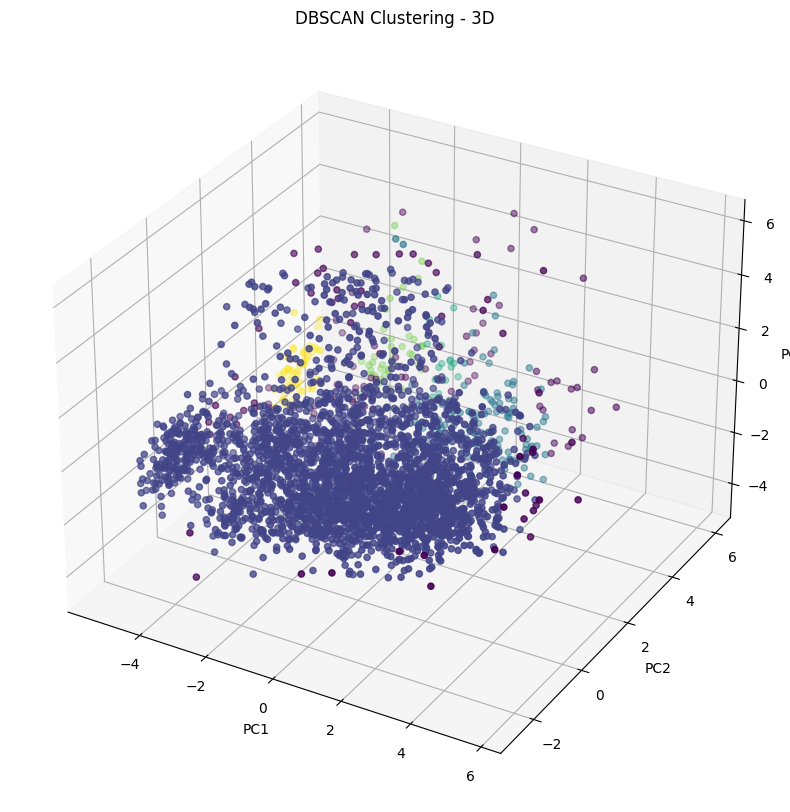

In [50]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.35, 10)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

## DBSCAN With 3 Dimensions 

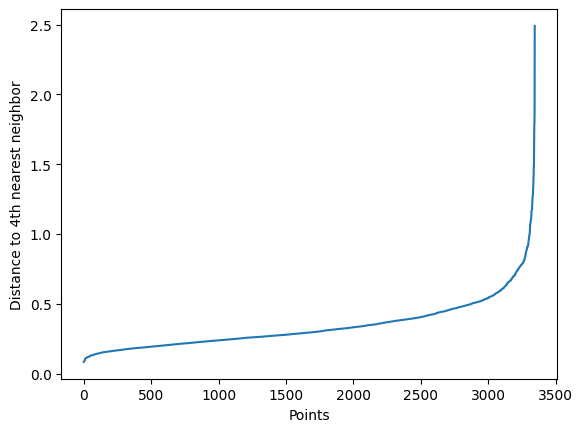

In [51]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_3reduced, 4)

#### Hyperparameters
eps =  [.25, .5, .75, 1], minPts = [6, 9, 12, 15]

In [52]:
D3_results = dbscan.range_hyperparameters(X_3reduced, [.25, .5, .75, 1], [6, 9, 12, 15])
D3_results

eps minPts  silhouette_score n_clusters
0   0.25      6         -0.510563         53
1   0.25      9         -0.452714         17
2   0.25     12         -0.398366          8
3   0.50      6          0.025039         11
4   0.50      9         -0.216154         12
5   0.50     12         -0.276136         11
6   0.50     15         -0.066165          5
7   0.75      6          0.287538          5
8   0.75      9          0.336997          4
9   0.75     12          0.299989          5
10  0.75     15          0.271706          6
11  1.00      6          0.389864          2
12  1.00      9          0.343929          3
13  1.00     12          0.377534          2
14  1.00     15          0.375894          2

note that highes scores came from values of eps = 1 , 0.75 and they produced 2-6 clusters <br>  Lets plot top scores on 2d and 3d

Number of Clusters =  2


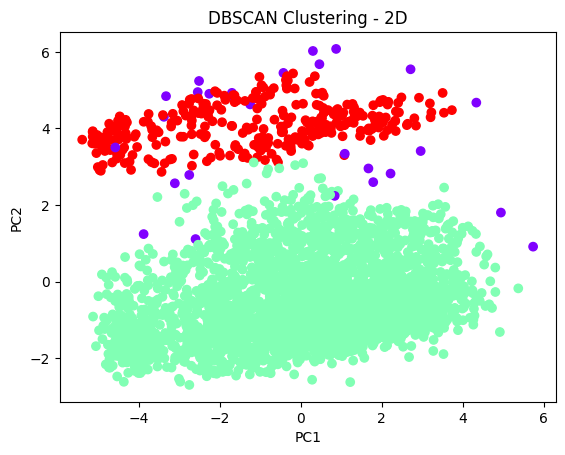

In [53]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, 1, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  4


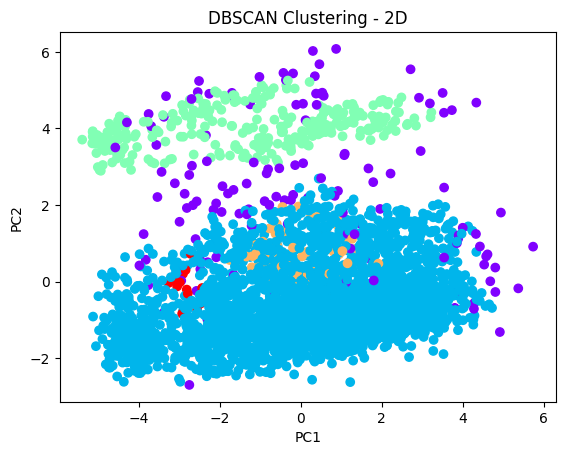

In [54]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, 0.75, 9)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  2


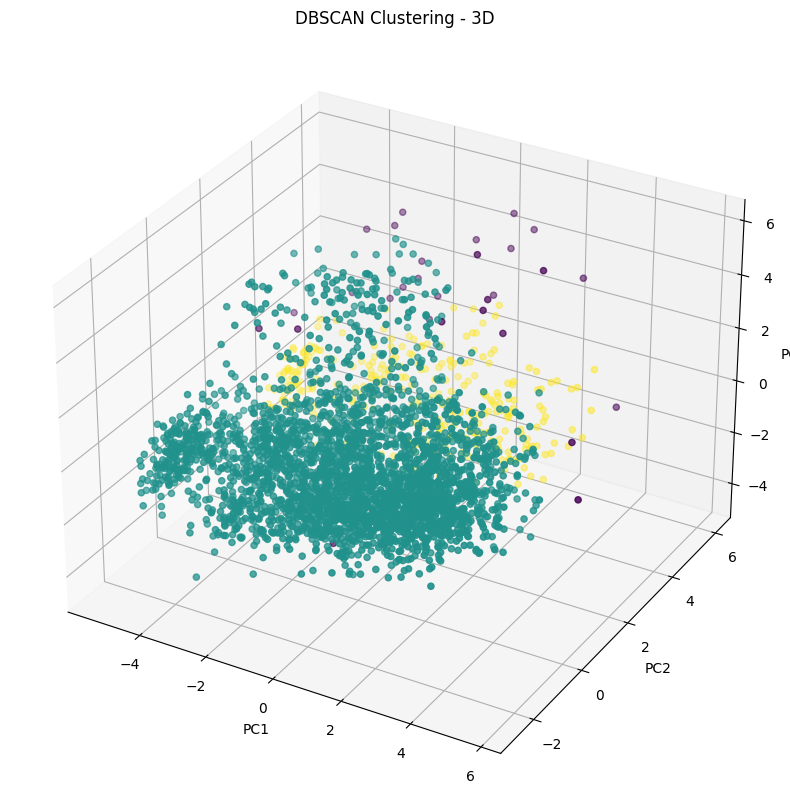

In [55]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, 1, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  5


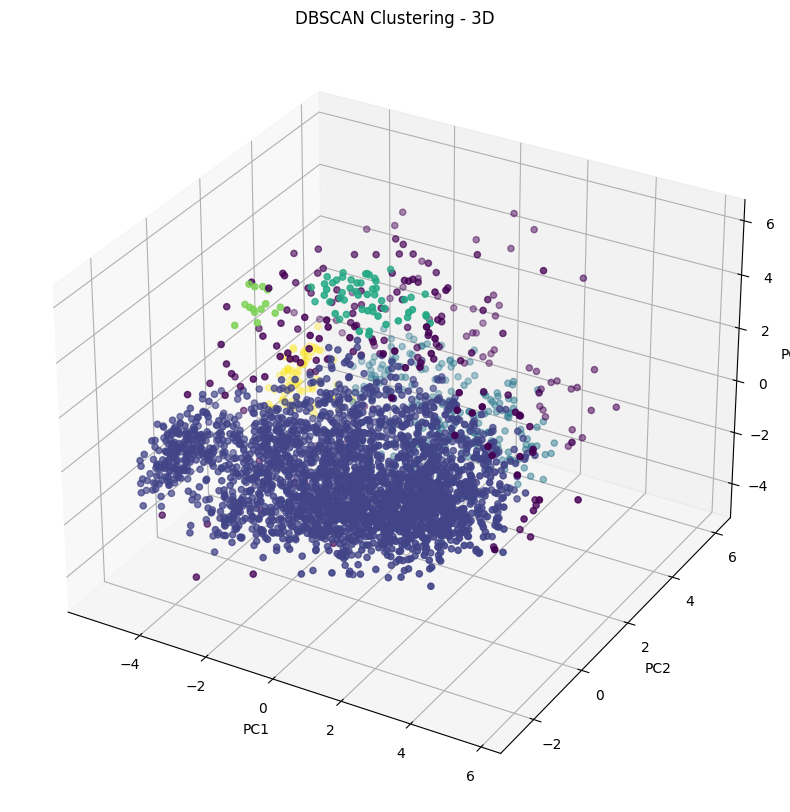

In [56]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .75, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

### Comparing the results from all models on Minmax data

In [57]:
standard_results= pd.DataFrame()

standard_results = pd.concat([D231_results, D2_results, D3_results],axis=0)


In [58]:
standard_results

eps minPts  silhouette_score n_clusters
0      6      2          0.130167          4
1    6.5      2          0.210236          2
2    6.5      3          0.210236          2
3    7.5      2          0.534094          2
0    0.2      4         -0.211422         25
1    0.2      6         -0.218220         21
2    0.2      8         -0.284764         18
3    0.2     10         -0.181140          8
4   0.25      4         -0.020874         15
5   0.25      6          0.023242         13
6   0.25      8         -0.162318         14
7   0.25     10          0.006408         11
8    0.3      4          0.129572          8
9    0.3      6          0.298244          8
10   0.3      8          0.288539          9
11   0.3     10          0.281530          8
12  0.35      4          0.304668          5
13  0.35      6          0.326006          4
14  0.35      8          0.349651          5
15  0.35     10          0.346236          5
16   0.4      4          0.186473          5
17   0.4      6          0.136205          4
18   0.4      8          0.365001          4
19   0.4     10          0.353060          5
0   0.25      6         -0.510563         53
1   0.25      9         -0.452714         17
2   0.25     12         -0.398366          8
3    0.5      6          0.025039         11
4    0.5      9         -0.216154         12
5    0.5     12         -0.276136         11
6    0.5     15         -0.066165          5
7   0.75      6          0.287538          5
8   0.75      9          0.336997          4
9   0.75     12          0.299989          5
10  0.75     15          0.271706          6
11   1.0      6          0.389864          2
12   1.0      9          0.343929          3
13   1.0     12          0.377534          2
14   1.0     15          0.375894          2

## Conclusions
Nominated best model for MinMax


Explained variance ratio for each component: [0.12570507 0.06839946]
Number of Clusters =  6


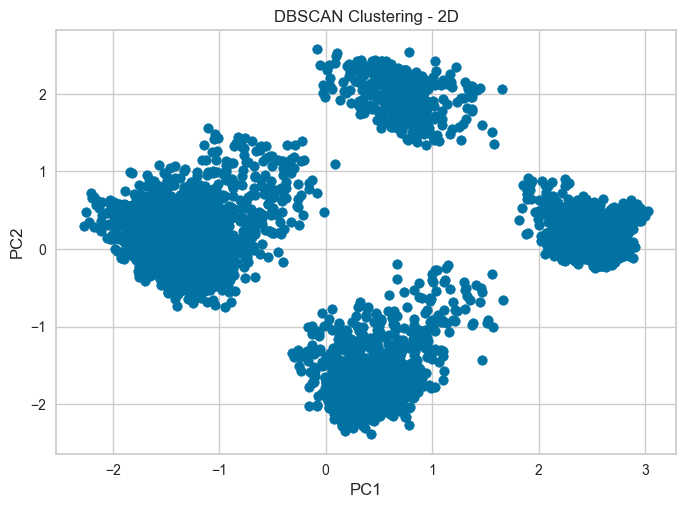

In [14]:
mmX_2reduced = dbscan.create_pca(minmax_data, 2)

# Visiualize on 2D
mmclusters = dbscan.perform_dbscan(mmX_2reduced, 0.15, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(mmclusters)) - (1 if -1 in mmclusters else 0))

# Plot results
EDA.create_scatterplot(mmX_2reduced[:, 0], mmX_2reduced[:, 1], xlabel='PC1', ylabel='PC2', title='DBSCAN Clustering - 2D')

Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]
Number of Clusters =  2


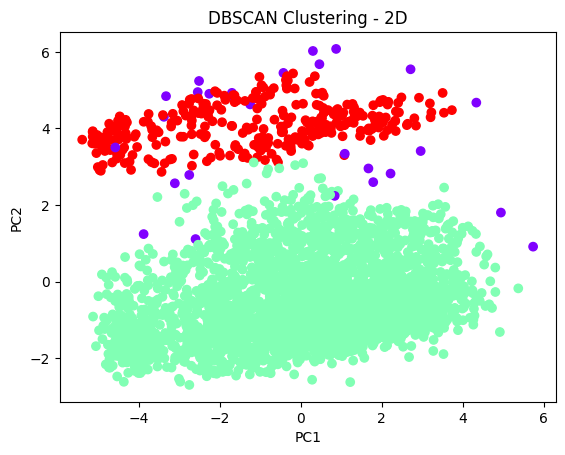

In [60]:
ssX_3reduced = dbscan.create_pca(standard_data, 3)

# Visiualize on 2D
ssclusters = dbscan.perform_dbscan(ssX_3reduced, 1, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(ssclusters)) - (1 if -1 in ssclusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=ssclusters, title='DBSCAN Clustering - 2D')

Append model labels to each dataset.

In [61]:
data["dbscan"] = ssclusters

In [19]:
data["dbscan_labels"] = mmclusters

save the minmax model

In [23]:
data.to_csv("../data/processed/data_scaled_minmax.csv", index=False)